**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
iris = load_iris()
X, y = iris.data, iris.target

In [ ]:
#split the dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
#feature scaling
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

**Build the MLP Model**

In [ ]:
X_train.shape[1]

4

In [ ]:
model = Sequential([
    Dense(10,input_shape=(X_train.shape[1],),activation="relu"),
    Dense(5,activation="relu"),
    Dense(3,activation="relu"),
    Dense(3,activation="softmax")
])

In [ ]:
#summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 3)                 18        
                                                                 
 dense_3 (Dense)             (None, 3)                 12        
                                                                 
Total params: 135 (540.00 Byte)
Trainable params: 135 (540.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#compile the model
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
#train the model
history=model.fit(X_train,y_train,validation_split=0.2,epochs=20, batch_size=5, verbose=1)

Epoch 1/20
20/20 [==============================] - 2s 27ms/step - loss: 1.1767 - accuracy: 0.3646 - val_loss: 1.2873 - val_accuracy: 0.2917
Epoch 2/20
20/20 [==============================] - 0s 11ms/step - loss: 1.0944 - accuracy: 0.3854 - val_loss: 1.1998 - val_accuracy: 0.2083
Epoch 3/20
20/20 [==============================] - 0s 9ms/step - loss: 1.0214 - accuracy: 0.3646 - val_loss: 1.1373 - val_accuracy: 0.2083
Epoch 4/20
20/20 [==============================] - 0s 10ms/step - loss: 0.9662 - accuracy: 0.3854 - val_loss: 1.0859 - val_accuracy: 0.2083
Epoch 5/20
20/20 [==============================] - 0s 7ms/step - loss: 0.9219 - accuracy: 0.3958 - val_loss: 1.0460 - val_accuracy: 0.2500
Epoch 6/20
20/20 [==============================] - 0s 7ms/step - loss: 0.8845 - accuracy: 0.3854 - val_loss: 1.0126 - val_accuracy: 0.2500
Epoch 7/20
20/20 [==============================] - 0s 7ms/step - loss: 0.8488 - accuracy: 0.4167 - val_loss: 0.9813 - val_accuracy: 0.2917
Epoch 8/20
20/20 

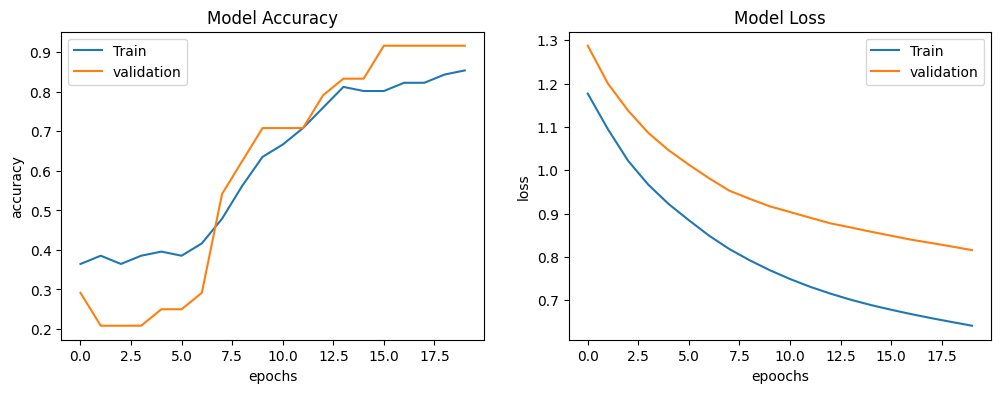

In [ ]:
#plot the accuracy and the loss
plt.figure(figsize=(12,4))
# Plot training & validation accuracy values
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(["Train","validation"],loc="upper left")


# Plot training & validation loss values
plt.subplot(1,2,2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("epoochs")
plt.ylabel("loss")
plt.legend(["Train","validation"],loc="upper right")

plt.show()

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 83.33%


In [ ]:
#Predict and compute accuracy score
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_true = np.argmax(y_test, axis=-1)
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy Score: {accuracy * 100:.2f}%")

1/1 [==============================] - 0s 150ms/step
Accuracy Score: 83.33%


**Lets use Batch Gradient Descent,Stochastic Gradient Descent (SGD),Mini-Batch Gradient Descent**

In [ ]:
# Build the MLP model
model = Sequential([
    Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(5, activation='relu'),
    Dense(3, activation='softmax')
])

**Compile and Train the Model with Different Gradient Descent Methods**

**Batch Gradient Descent:**

In [ ]:
# Compile the model for Batch Gradient Descent
model.compile(optimizer=tf.keras.optimizers.SGD(),  # Default SGD is equivalent to Batch Gradient Descent
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model using Batch Gradient Descent
history_batch = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=len(X_train), verbose=1)

Epoch 1/50
1/1 [==============================] - 1s 736ms/step - loss: 1.1286 - accuracy: 0.3021 - val_loss: 1.0762 - val_accuracy: 0.2500
Epoch 2/50
1/1 [==============================] - 0s 38ms/step - loss: 1.1192 - accuracy: 0.3438 - val_loss: 1.0706 - val_accuracy: 0.2500
Epoch 3/50
1/1 [==============================] - 0s 60ms/step - loss: 1.1098 - accuracy: 0.3646 - val_loss: 1.0653 - val_accuracy: 0.2500
Epoch 4/50
1/1 [==============================] - 0s 40ms/step - loss: 1.1007 - accuracy: 0.3646 - val_loss: 1.0602 - val_accuracy: 0.2500
Epoch 5/50
1/1 [==============================] - 0s 57ms/step - loss: 1.0922 - accuracy: 0.3750 - val_loss: 1.0555 - val_accuracy: 0.2500
Epoch 6/50
1/1 [==============================] - 0s 37ms/step - loss: 1.0840 - accuracy: 0.3854 - val_loss: 1.0506 - val_accuracy: 0.2500
Epoch 7/50
1/1 [==============================] - 0s 41ms/step - loss: 1.0753 - accuracy: 0.3854 - val_loss: 1.0463 - val_accuracy: 0.2917
Epoch 8/50
1/1 [==========

**Stochastic Gradient Descent (SGD):**

In [ ]:
# Compile the model for Stochastic Gradient Descent
model.compile(optimizer=tf.keras.optimizers.SGD(),  # SGD with batch_size=1 is equivalent to Stochastic Gradient Descent
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model using Stochastic Gradient Descent
history_stochastic = model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=1, verbose=1)

Epoch 1/20
96/96 [==============================] - 1s 7ms/step - loss: 0.0876 - accuracy: 0.9583 - val_loss: 0.0873 - val_accuracy: 0.9583
Epoch 2/20
96/96 [==============================] - 0s 3ms/step - loss: 0.0810 - accuracy: 0.9583 - val_loss: 0.0642 - val_accuracy: 1.0000
Epoch 3/20
96/96 [==============================] - 0s 2ms/step - loss: 0.0873 - accuracy: 0.9583 - val_loss: 0.0780 - val_accuracy: 0.9583
Epoch 4/20
96/96 [==============================] - 0s 3ms/step - loss: 0.0807 - accuracy: 0.9479 - val_loss: 0.0579 - val_accuracy: 1.0000
Epoch 5/20
96/96 [==============================] - 0s 3ms/step - loss: 0.0871 - accuracy: 0.9583 - val_loss: 0.0795 - val_accuracy: 0.9583
Epoch 6/20
96/96 [==============================] - 0s 2ms/step - loss: 0.0838 - accuracy: 0.9583 - val_loss: 0.0729 - val_accuracy: 0.9583
Epoch 7/20
96/96 [==============================] - 0s 3ms/step - loss: 0.0826 - accuracy: 0.9583 - val_loss: 0.0973 - val_accuracy: 0.9583
Epoch 8/20
96/96 [==

**Mini-Batch Gradient Descent:**

In [ ]:
# Compile the model for Mini-Batch Gradient Descent
model.compile(optimizer=tf.keras.optimizers.SGD(),  # SGD with a batch_size between 1 and len(X_train) is Mini-Batch Gradient Descent
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model using Mini-Batch Gradient Descent
history_mini_batch = model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=32, verbose=1)


Epoch 1/20
3/3 [==============================] - 1s 102ms/step - loss: 0.0634 - accuracy: 0.9688 - val_loss: 0.0647 - val_accuracy: 0.9583
Epoch 2/20
3/3 [==============================] - 0s 22ms/step - loss: 0.0641 - accuracy: 0.9688 - val_loss: 0.0650 - val_accuracy: 0.9583
Epoch 3/20
3/3 [==============================] - 0s 28ms/step - loss: 0.0637 - accuracy: 0.9688 - val_loss: 0.0653 - val_accuracy: 0.9583
Epoch 4/20
3/3 [==============================] - 0s 23ms/step - loss: 0.0632 - accuracy: 0.9792 - val_loss: 0.0654 - val_accuracy: 0.9583
Epoch 5/20
3/3 [==============================] - 0s 19ms/step - loss: 0.0632 - accuracy: 0.9792 - val_loss: 0.0655 - val_accuracy: 0.9583
Epoch 6/20
3/3 [==============================] - 0s 30ms/step - loss: 0.0640 - accuracy: 0.9792 - val_loss: 0.0655 - val_accuracy: 0.9583
Epoch 7/20
3/3 [==============================] - 0s 36ms/step - loss: 0.0633 - accuracy: 0.9792 - val_loss: 0.0657 - val_accuracy: 0.9583
Epoch 8/20
3/3 [==========

Batch Gradient Descent Test Accuracy: 100.00%


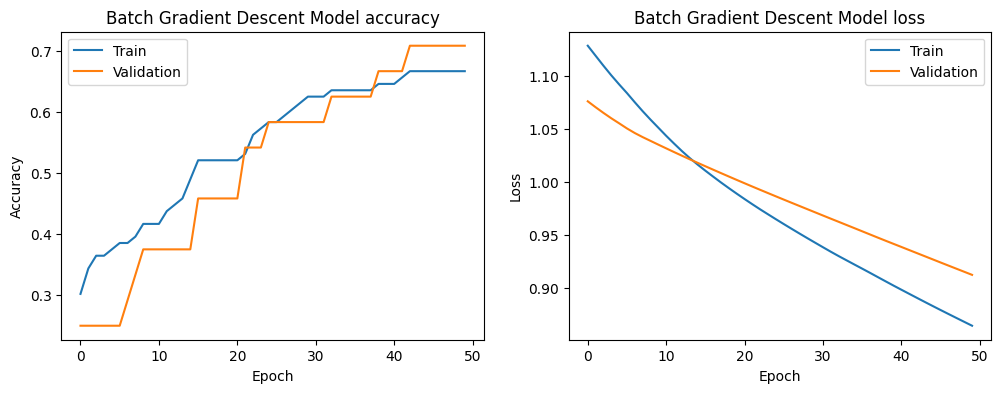

Stochastic Gradient Descent Test Accuracy: 100.00%


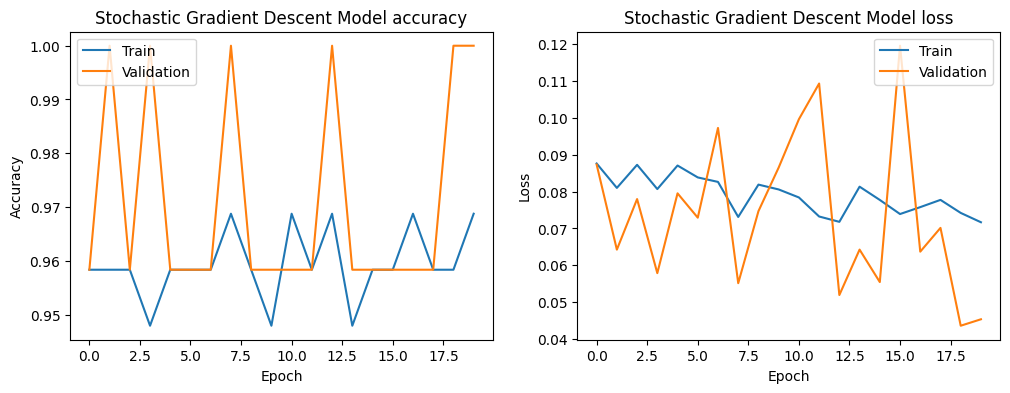

Mini-Batch Gradient Descent Test Accuracy: 100.00%


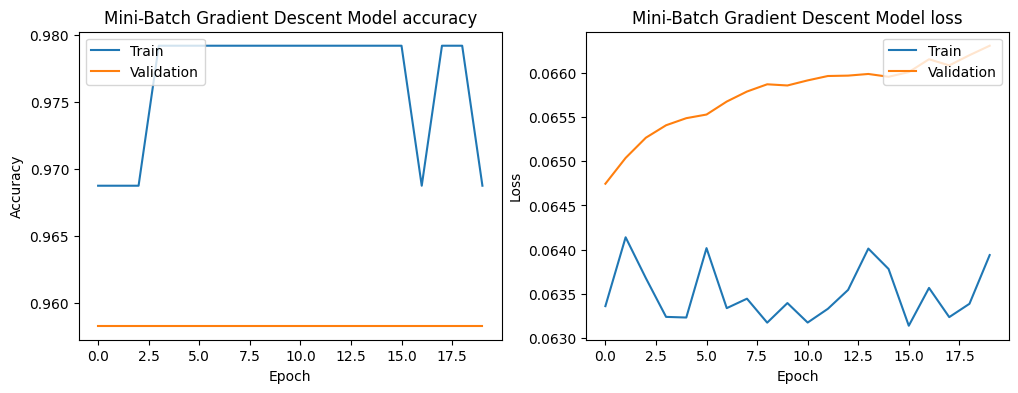

In [ ]:
#Evaluate the model
def evaluate_model(history, X_test, y_test, title):
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"{title} Test Accuracy: {accuracy * 100:.2f}%")

    # Plot accuracy and loss
    plt.figure(figsize=(12, 4))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{title} Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{title} Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper right')

    plt.show()

# Evaluate and plot results for Batch Gradient Descent
evaluate_model(history_batch, X_test, y_test, 'Batch Gradient Descent')

# Evaluate and plot results for Stochastic Gradient Descent
evaluate_model(history_stochastic, X_test, y_test, 'Stochastic Gradient Descent')

# Evaluate and plot results for Mini-Batch Gradient Descent
evaluate_model(history_mini_batch, X_test, y_test, 'Mini-Batch Gradient Descent')